In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import optim

In [4]:
pipeline  = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [5]:
dataset = datasets.MNIST( './data',True,transform = pipeline,download=True )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.73MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.96MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
image_loader = DataLoader(dataset,batch_size = 64,shuffle = True)

In [7]:
class Network(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = torch.nn.Linear(784,128)
    self.hidden2 = torch.nn.Linear(128,64)
    self.output = torch.nn.Linear(64,10)

  def forward(self,x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.log_softmax(self.output(x),dim=1)
    return x

In [8]:
#defining Model
model = Network()

In [9]:
#loss function
loss = torch.nn.NLLLoss()

In [10]:
#Optimizer function
optimizer = optim.SGD(model.parameters(), 0.01)

In [14]:
epochs = 6
for e in range(epochs):
  running_loss = 0
  for image,label in(image_loader):
    flat_img = image.view(image.shape[0],-1)
    output = model.forward(flat_img)

    #removing previous grads
    optimizer.zero_grad()

    #loss
    error = loss(output,label)

    #backpropogation
    error.backward()

    #optimization
    optimizer.step()

    running_loss +=error.item()
  else:
    print(f"Training loss: {running_loss/len(image_loader)}")


Training loss: 1.0794796576060213
Training loss: 0.3923467895401312
Training loss: 0.32938910337653493
Training loss: 0.2974894408430499
Training loss: 0.27389017969512863
Training loss: 0.25261936831607745


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    """Visualizes an image and its predicted probabilities."""
    ps = ps.detach().numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)
    ax1.imshow(img.squeeze(), cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(len(ps)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(ps)))
    ax2.set_yticklabels(np.arange(len(ps)))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


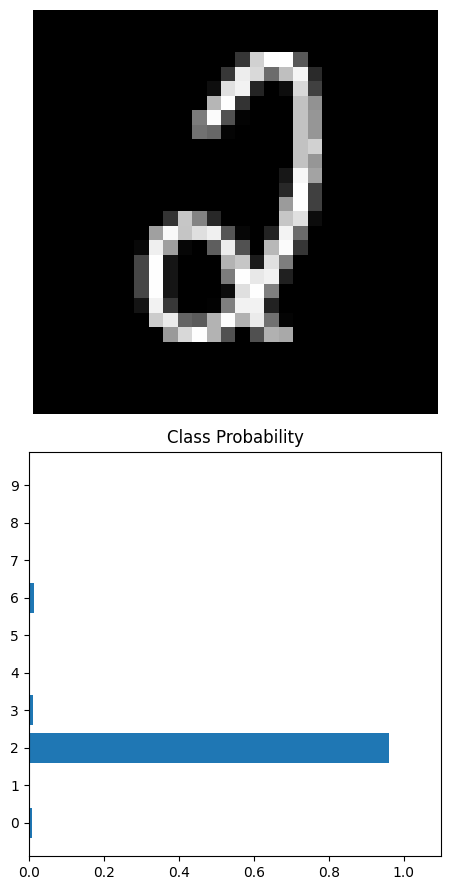

In [15]:
%matplotlib inline
images, labels = next(iter(image_loader))
img = images[1].view(1,784)
with torch.no_grad():
  logps = model(img)
ps = F.softmax(logps,dim=1)

view_classify(img.view(1,28,28),ps)